In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo
import numpy as np
import my_functions as my
import gsw
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import my_plot_params

In [4]:
dat_saz = xr.open_dataset('../data/dat_saz_6H.nc')
dat_pfz = xr.open_dataset('../data/dat_pfz_6H.nc')
dat_miz = xr.open_dataset('../data/dat_miz_6H.nc')

In [219]:
mld_05 = my.calc_mld(dat_saz.density.values, dat_saz.depth.values, den_lim=0.03)

In [5]:
for i, data in enumerate([dat_saz, dat_pfz, dat_miz]):
    
    data['mld_03'] = (('time'), my.calc_mld(data.density.values, data.depth.values, den_lim=0.03))

    mld    =  data['mld_03'].astype(int).values
    mld_15 = (data['mld_03'].values*1.5).astype(int)
    
    QI = np.ndarray(mld.shape)
    
    for i, val in enumerate(mld):
    
        den_mld      = data['density'].isel(time=i)[:val].values
        den_mld_mean = data['density'].isel(time=i)[:val].mean().values
        rmse_mld     = np.std(den_mld[den_mld>0]-den_mld_mean)
        
        val_15 = mld_15[i]
        den_mld_15      = data['density'].isel(time=i)[:val_15].values
        den_mld_mean_15 = data['density'].isel(time=i)[:val_15].mean().values
        rmse_mld_15     = np.std(den_mld_15[den_mld_15>0]-den_mld_mean_15)
    
        QI[i] = 1 - (rmse_mld/rmse_mld_15) 
        
    good =   QI>0.8
    ok   = ((QI<0.8) & (QI>0.5))
    bad  =   QI<0.5
    
    good = data.sel(time=good)
    ok   = data.sel(time=ok)
    bad  = data.sel(time=bad)
    
    print('good: '+str(100*len(good.time)/len(data.time)))
    print('ok: '  +str(100*len(ok.time)  /len(data.time)))
    print('bad: ' +str(100*len(bad.time) /len(data.time)))

good: 65.04065040650407
ok: 22.22222222222222
bad: 12.737127371273713
good: 86.58892128279884
ok: 13.119533527696793
bad: 0.2915451895043732
good: 85.96059113300493
ok: 11.576354679802956
bad: 2.4630541871921183


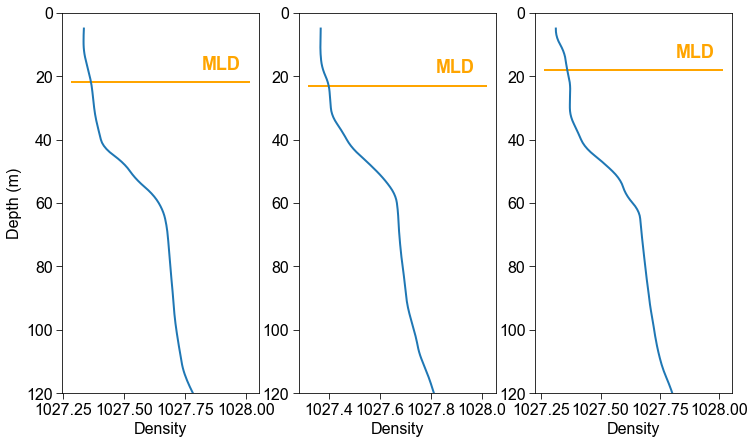

In [10]:
fig,ax = plt.subplots(1,3,figsize=[12, 7])

prof=[15,19,20]

dat = bad

for i,val in enumerate(prof):
    
    ax[i].plot(dat.density.isel(time=i), dat.depth)
    
    xmin=dat.density.isel(time=i).min()-0.05
    xmax=dat.density.isel(time=i).max()+0.05
    
    ax[i].hlines(y=dat.mld_03.isel(time=i), xmin=xmin, xmax=xmax, colors='orange')
    ax[i].text(xmax-0.2, dat.mld_03.isel(time=i)-4, 'MLD', color='orange', fontweight='bold', fontsize=18)
    
    ax[i].set_ylim(120, 0)
    
    ax[i].set_xlabel('Density')
ax[0].set_ylabel('Depth (m)')

plt.savefig('../figs_submission2/MLD_03_QI_bad_profiles.png')

##### def rmse(data, data_mean):
    
    return np.mean(np.sqrt((data-data_mean)**2))
    
rho_mld =

QI = 1 - ( rmse() )

In [3]:
dat_saz

<xarray.Dataset>
Dimensions:      (time: 369, depth: 1000)
Coordinates:
  * time         (time) datetime64[ns] 2018-12-10T03:00:00 ... 2019-03-12T03:...
  * depth        (depth) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables: (12/25)
    temp         (time, depth) float64 ...
    salt         (time, depth) float64 ...
    lat          (time) float64 ...
    lon          (time) float64 ...
    density      (time, depth) float64 ...
    mld_01       (time) float64 ...
    ...           ...
    v10          (time) float64 ...
    emp          (time) float64 ...
    qnet         (time) float64 ...
    taux         (time) float64 ...
    tauy         (time) float64 ...
    wind_dir     (time) float64 ...